# Анализ оттока клиентов «Метанпромбанк»

## Описание проекта
<br> Вы работаете аналитиком данных в банке, главной задачей является анализ оттока клиентов. 
<br> Анализ покажет, какие клиенты уходят из банка, а так же поможет составить сегменты клиентов, которые склонны уходить из банка.

### Задачи исследования
- Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.
- Проведите исследовательский анализ данных, определите все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д)
- Проверьте статистические гипотезы:
<br> Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.
<br> Гипотеза влияния наличия кредитной карты у клиента на вероятность оттока.
- Объединяя признаки отточности, сформируйте сегменты, отберите из них лучшие и дайте по ним рекомендации.
- По итогам исследования подготовьте презентацию.

###  Описание данных
<br>  Датасет содержит данные о клиентах банка «Метанпром». 
<br>  Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
<br> Колонки:
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- equity — количество баллов собственности,
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- last_activity — активный клиент,
- estimated_salary — заработная плата клиента,
- Churn — ушёл или нет.

По предварительному плану работы будет проведена предобработка имеющихся данных, поиск аномалий и закономерностей.
Необходимо выяснить основные причины оттока клиентов банка, выделить портреты клиентов, которые склонны уходить из банка, а также проверить гипотезы:
<br> 1. Различия дохода между теми клиентами, которые ушли и теми, которые остались.
<br> 2. Различия влияния между наличием кредитных карт у клиента на вероятность оттока.

## Знакомство с данными

### Откроем файл с данными и изучим общую информацию

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
from plotly import graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns 
import math as mth
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Импортируем даные
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
# Выведем данные из датафрема
data.info()
pd.options.display.max_colwidth = 200
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [4]:
data.loc[data['age'].isnull()]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


В столбцах возраст и баланс на счете есть пропуски, пока оставим их без изменений.

In [5]:
data.shape

(10000, 12)

В датафрейме 10000 строк и 12 столбцов.

## Предобработка данных

### Подготовим данные

In [6]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [7]:
# для удобства переводим столбцы в целочисленные значения, там где можно откинуть нули после запятой
data['score'] = data['score'].astype('Int64')
data['age'] = data['age'].astype('Int64')
data['userid'] = data['userid'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  Int64  
 1   score          10000 non-null  Int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   Int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: Int64(3), float64(2), int64(5), object(2)
memory usage: 966.9+ KB


In [8]:
# проверим значения столбцов на уникальность
display(
    data['city'].unique()
)
display(
    data['gender'].unique()
)

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

array(['Ж', 'М'], dtype=object)

Задвоенных значений не найдено.

In [9]:
# сделаем то же самое для бинарных значений
display(
    data['credit_card'].unique()
)
display(
    data['last_activity'].unique()
)
display(
    data['churn'].unique()
)

array([0, 1])

array([1, 0])

array([1, 0])

Ошибок нет.

In [10]:
# Изучим распределение клиентов по городам
display(
data['city'].value_counts())
data['city'].unique()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

В датафрейме имеется информация о пользователях из трех городов - Рыбинск, Ярославль и Ростов, больше половины клиентов - из Ярославля.

In [11]:
# для удобства заменим значения пола и городов на бинарные
data['city_1']=data['city']
data['gender_1']=data['gender']
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_1,gender_1
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [12]:
# кодируем данные в столбцах city_1 и gender_1:
data = pd.get_dummies(data, columns = ['city_1', 'gender_1'])
data = data.rename (
    columns = ({
        'city_1_Ростов':'Ростов', 'city_1_Рыбинск':'Рыбинск','city_1_Ярославль':'Ярославль', 
        'gender_1_Ж':'female', 'gender_1_М':'male'}))
display (data.head())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


In [13]:
# Проверям дубликаты
print(data.duplicated().sum())

0


Явных дубликатов нет.

### Изучим и проверим данные

In [14]:
data['userid'].nunique()

9927

В датафрейме 9927 уникальных пользователей, получается, что мы имеем 73 строки с повторяющимися идентификаторами пользователей.

In [15]:
data[data[['userid']].duplicated()].head(50)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
1583,190253,726,Ярославль,М,49,0,NaN,1,1,1,177700.78,0,0,0,1,0,1
1837,210662,896,Рыбинск,Ж,37,0,NaN,2,0,0,90916.04,0,0,1,0,1,0
2138,131419,739,Рыбинск,Ж,37,3,1307941.65,3,0,0,103867.47,0,0,1,0,1,0
2165,187635,692,Рыбинск,Ж,<NA>,0,NaN,1,1,1,160368.82,0,0,1,0,1,0
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0,0,1,0,1,0
2444,221156,913,Ярославль,М,<NA>,0,NaN,1,1,1,135693.24,0,0,0,1,0,1
2998,208081,821,Рыбинск,Ж,62,3,493608.26,2,1,1,33491.45,0,0,1,0,1,0
3039,170312,813,Рыбинск,Ж,47,3,370027.67,2,0,0,129835.56,0,0,1,0,1,0
3106,185748,912,Ярославль,Ж,47,5,1598218.98,2,0,0,180256.98,0,0,0,1,1,0
3817,211130,918,Рыбинск,Ж,55,0,NaN,2,1,1,244202.04,0,0,1,0,1,0


Вертояно, причиной отсутствующих значений является сбой при выгрузке данных, т.к. некоторые дублирующиеся userid не имеют ни возраста, ни баланса, т.к. их менее 1%, можно их удалить.

In [16]:
data['userid'] = data['userid'].drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9927 non-null   Int64  
 1   score          10000 non-null  Int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   Int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
 12  Ростов         10000 non-null  uint8  
 13  Рыбинск        10000 non-null  uint8  
 14  Ярославль      10000 non-null  uint8  
 15  female         10000 non-null  uint8  
 16  male           10000 non-null  uint8  
dtypes: Int64(3), float64(2), int64(5), object(2), uint8

In [17]:
data = data.dropna(subset=['userid', 'age'])
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9923 non-null   Int64  
 1   score          9923 non-null   Int64  
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   Int64  
 5   equity         9923 non-null   int64  
 6   balance        7663 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   int64  
 12  Ростов         9923 non-null   uint8  
 13  Рыбинск        9923 non-null   uint8  
 14  Ярославль      9923 non-null   uint8  
 15  female         9923 non-null   uint8  
 16  male           9923 non-null   uint8  
dtypes: Int64(3), float64(2), int64(5), object(2), uint8(

Дубликаты и пропуски удалены из всего датафрейма, кроме столбца с балансом.

In [18]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
count,9923.00,9923.00,9923.00,9923.00,7663.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00
mean,171731.48,848.73,42.73,2.63,828248.16,1.87,0.68,0.52,147886.49,0.18,0.14,0.27,0.59,0.50,0.50
std,33694.37,65.40,12.18,1.98,1984247.69,0.79,0.47,0.50,139363.90,0.39,0.35,0.44,0.49,0.50,0.50
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00,0.00,0.00,0.00,0.00,0.00
25%,142720.00,802.00,33.00,0.00,295498.98,1.00,0.00,0.00,75252.12,0.00,0.00,0.00,0.00,0.00,0.00
50%,172635.00,853.00,40.00,3.00,524961.22,2.00,1.00,1.00,119719.33,0.00,0.00,0.00,1.00,0.00,1.00
75%,201157.50,900.00,51.00,4.00,980801.49,2.00,1.00,1.00,174673.28,0.00,0.00,1.00,1.00,1.00,1.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00,1.00,1.00,1.00,1.00,1.00


<br> Срдений возраст пользователей банка - 43 года. Минимальный - 18 лет, а самый старший - 86. Здесь все хорошо.
<br> Средний баланс карты - 828 248р, достаточно неплохо, но также имеются клиенты с нулевым балансом.
<br> В среднем у клиентов банка имеется 2 продукта, также мы нашли клиентов, у которых 0 продуктов, соответственно они не являются клиентами банка, рассмотрим их позже.
<br> Средняя зарплата клиентов банка равна 147 886 рублей. Минимальная - 2546 рубля, скорее всего это какая-то выплата или пособие, которая пришла на карту клиенту.
<br> Мы видим, что в большинстве столбцов данные распределены нормально, стандартное отклоенине небольшое, также по полу клиенты распределены пополам.

In [19]:
data = data.query('products > 0')
display(data.describe())
data.shape

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
count,9922.00,9922.00,9922.00,9922.00,7663.00,9922.00,9922.00,9922.00,9922.00,9922.00,9922.00,9922.00,9922.00,9922.00,9922.00
mean,171733.89,848.72,42.73,2.63,828248.16,1.87,0.68,0.52,147898.87,0.18,0.14,0.27,0.59,0.50,0.50
std,33695.22,65.39,12.17,1.98,1984247.69,0.79,0.47,0.50,139365.46,0.39,0.35,0.44,0.49,0.50,0.50
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00,0.00,0.00,0.00,0.00,0.00
25%,142715.00,802.00,33.00,0.00,295498.98,1.00,0.00,0.00,75254.04,0.00,0.00,0.00,0.00,0.00,0.00
50%,172643.00,853.00,40.00,3.00,524961.22,2.00,1.00,1.00,119735.43,0.00,0.00,0.00,1.00,0.00,1.00
75%,201157.75,900.00,51.00,4.00,980801.49,2.00,1.00,1.00,174679.64,0.00,0.00,1.00,1.00,1.00,1.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00,1.00,1.00,1.00,1.00,1.00


(9922, 17)

Теперь у всех клиентов имеется хотя бы один продукт.

In [20]:
# определим долю пропусков в колонке с балансом клиентов
data['balance'].isna().sum()/len(data)

0.2276758718000403

Пропусков около 23%, оставляем их как есть.

## Исследовательский анализ данных

### Проведем анализ средних значений

In [21]:
# посмотрим на средние значения для клиентов по городам и факту оттока
mean_data = data.drop('userid', axis=1).groupby(['city', 'churn']).mean()
mean_data

score   age  equity    balance  products  credit_card  \
city      churn                                                          
Ростов    0     839.97 44.45    2.61  591977.75      1.78         0.58   
          1     854.23 42.81    3.65  903091.54      2.20         0.50   
Рыбинск   0     845.96 43.50    2.43  658143.18      1.73         0.67   
          1     862.36 42.24    3.60  942553.00      2.25         0.51   
Ярославль 0     846.52 42.44    2.30  811044.64      1.77         0.76   
          1     865.92 40.79    3.86 1264463.40      2.47         0.58   

                 last_activity  est_salary  Ростов  Рыбинск  Ярославль  \
city      churn                                                          
Ростов    0               0.50   108722.47    1.00     0.00       0.00   
          1               0.66   123662.56    1.00     0.00       0.00   
Рыбинск   0               0.53   135542.24    0.00     1.00       0.00   
          1               0.74   133156.93    0.00     1.00       0.00   
Ярославль 0               0.46   163022.49    0.00     0.00       1.00   
          1               0.70   160149.42    0.00     0.00       1.00   

                 female  male  
city      churn                
Ростов    0        0.56  0.44  
          1        0.34  0.66  
Рыбинск   0        0.55  0.45  
          1        0.32  0.68  
Ярославль 0        0.52  0.48  
          1        0.36  0.64

<br> Средний кредитный рейтинг в городах практически не отличается, но у клиентов, которые ушли, он, как правило, выше.
<br> Средний возраст клиентов в городах тоже практически одинаковый.
<br> Баланс у клиентов, которые ушли также в среднем больше.
<br> Можно заметить, что чаще уходят люди, у которых 3 и более продуктов банка, стоит над этим задумываться, возможно, им не нравится качество данных продуктов и они уходят к конкурентам.
<br> Также можно заметить, что уходят клиенты с большей зарплатой.

### Проведем анализ распределения значений

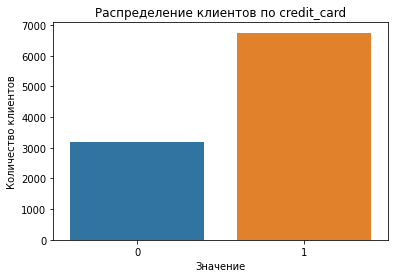

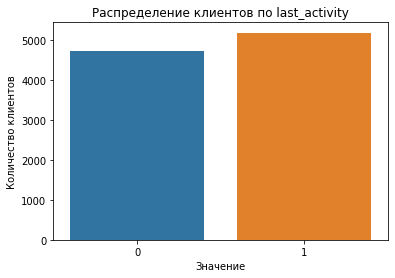

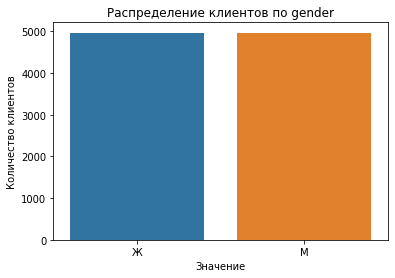

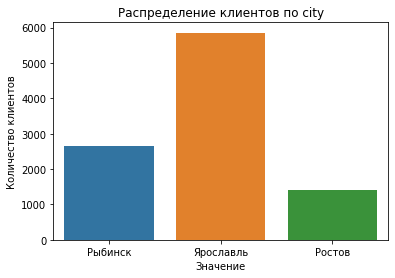

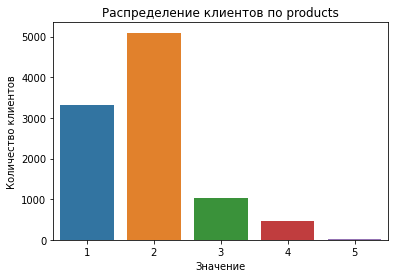

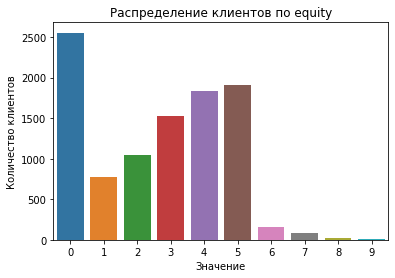

In [22]:
# Дискретные признаки визуализируем методом "countplot"
for col in data[['credit_card', 'last_activity', 'gender', 'city', 'products', 'equity']].columns:
    ax = sns.countplot(x = col, data = data)
    plt.title('Распределение клиентов по ' + col)
    plt.ylabel('Количество клиентов')
    plt.xlabel('Значение')
    plt.show()

По графикам можно сделать следующие выводы:
- большая часть клиентов пользуется кредитной картой;
- активный и неактивных клиентов почти пополам, это не очень хороший показатель для банка, стоит его взять на контроль;
- в представленных данных женщин немного больше чем мужчин;
- большинство клиентов из Ярославля, далее идет Рыбинск и на последнем месте по количеству Ростов;
- у большинства клиентов 2 продукта
- количество баллов собственности больше всего достигает пяти и далее плавно уменьшается.

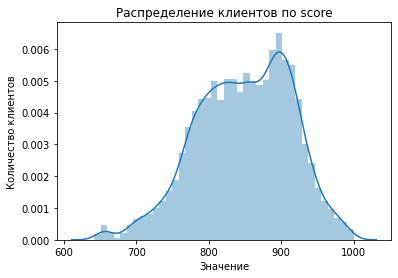

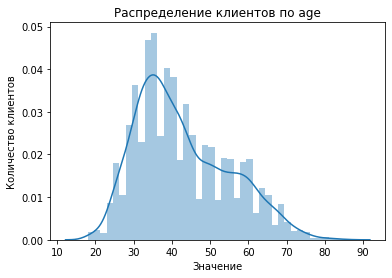

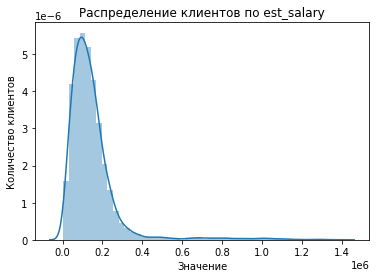

In [23]:
# Непрерывные признаки визуализируем методом "distplot"
for col in data[['score', 'age', 'est_salary']].columns:
    sns.distplot(data[col])
    plt.title('Распределение клиентов по ' + col)
    plt.ylabel('Количество клиентов')
    plt.xlabel('Значение')
#    plt.legend(['Остались', 'Отток'])
    plt.show()

- В распределении клиентов по рейтингу мы видим, что есть некоторое падение на значении 850.
- В распределении клиентов по возрасту мы видим, что имеется падение числа клиентов в возрасте 32-35 и 50-52 лет
- Заработок распределен нормально, средний около 150тр с длинным хвостом на большие значения.

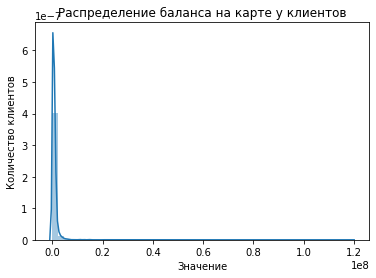

In [24]:
# Посмотрим на распределение баланса клиентов
data_balance = data.dropna()

sns.distplot(data_balance['balance'])
plt.title('Распределение баланса на карте у клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Значение')
#plt.legend(['Остались', 'Отток'])
plt.show()

По балансу мы видимо подобную картину на графике, что и по заработку, средний баланс клиента около 1 млн рублей и также имеется длинный хвост в сторону увеличения.

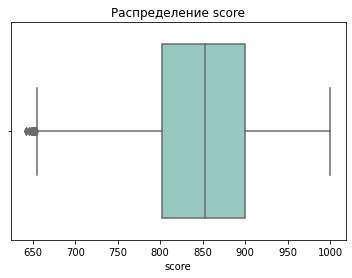

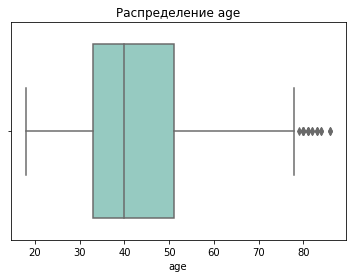

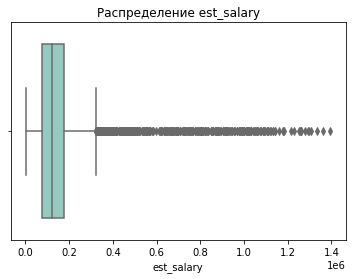

In [25]:
# Посмотрим на boxplot для различных признаков
for col in data[['score', 'age','est_salary']]:
    ax = sns.boxplot(x=data[col], palette="Set3")
    plt.title('Распределение ' + col)
    plt.show()

Как раз таки данные выбросы заработка хорошо видны на графике "ящик с усами", но удалять мы их не будем, т.к. их достаточно много.

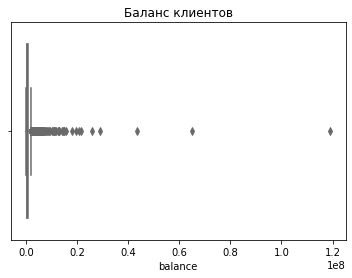

In [26]:
# Посмотрим на boxplot для баланса клиентов
ax = sns.boxplot(x=data_balance['balance'], palette="Set3")
plt.title('Баланс клиентов')
plt.show()

С балансом картина аналогичная, как и с график заработка (поступлений на карту) клиента.

### Проведем анализ по количеству используемых продуктов

In [27]:
# Проведем дополнительный анализ по количеству используемых продуктов банка для всех клиентов
data['products'].value_counts()

2    5095
1    3306
3    1028
4     474
5      19
Name: products, dtype: int64

Большинство клиентов пользуется одним либо двумя продуктами банка.

### Построим графики распределения признаков в разрезе оттока

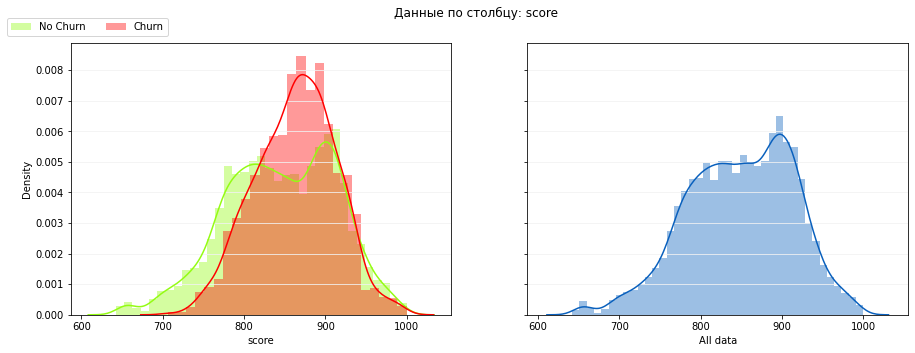

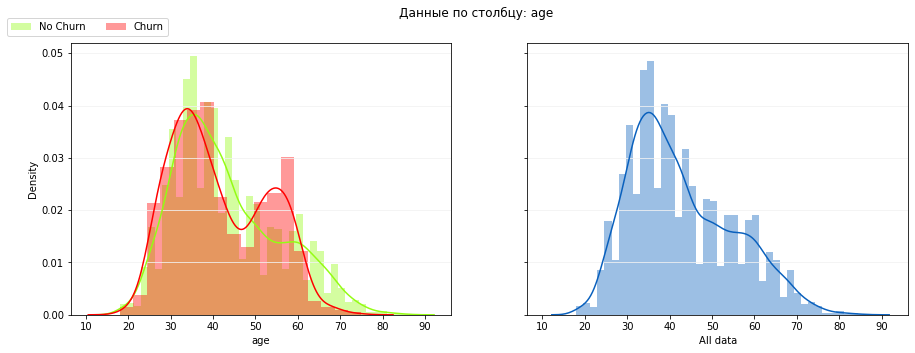

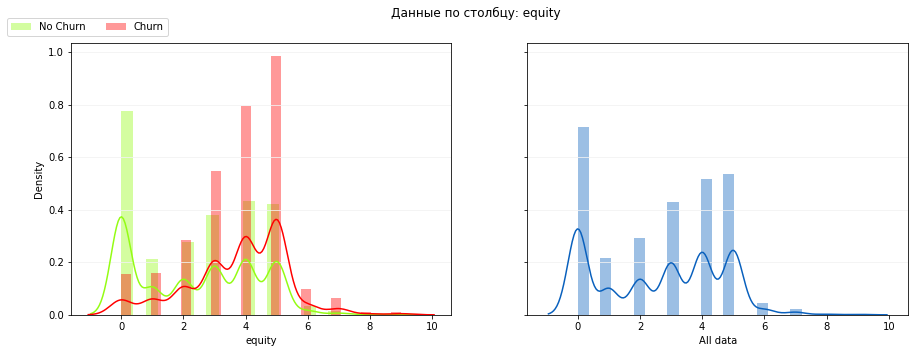

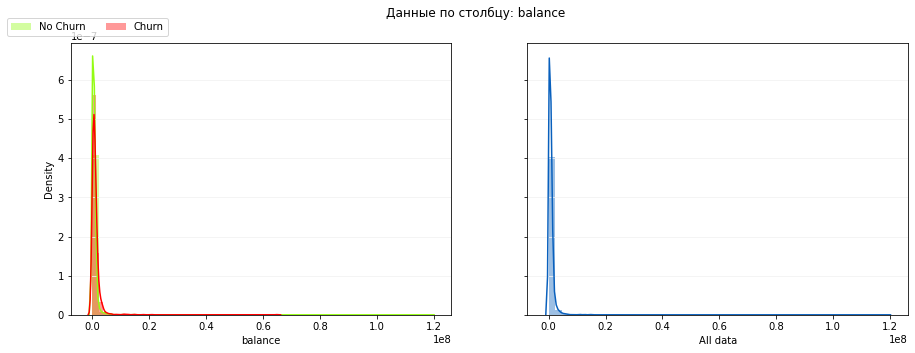

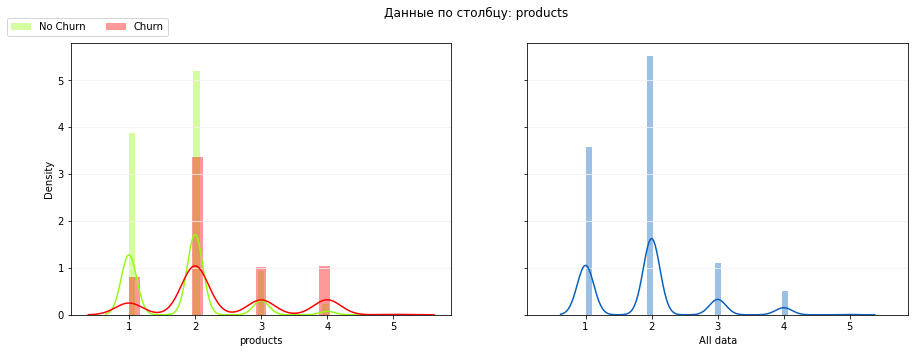

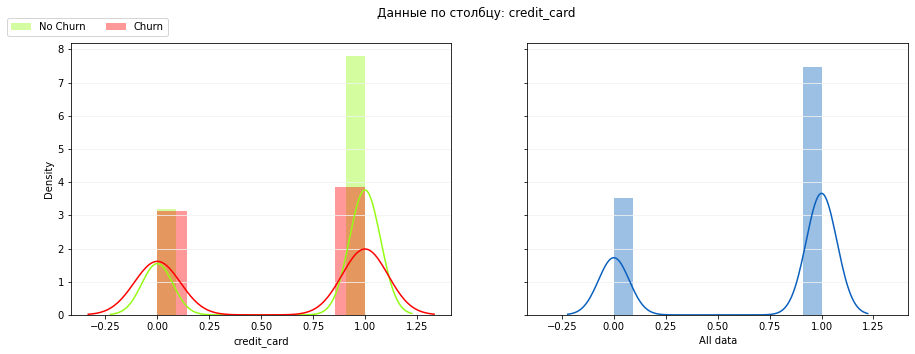

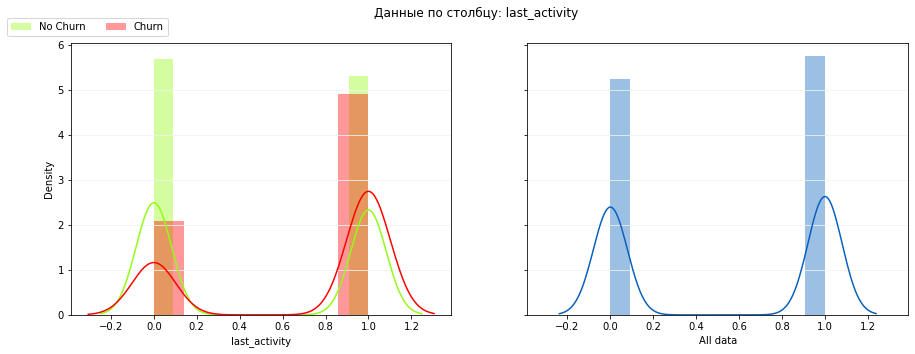

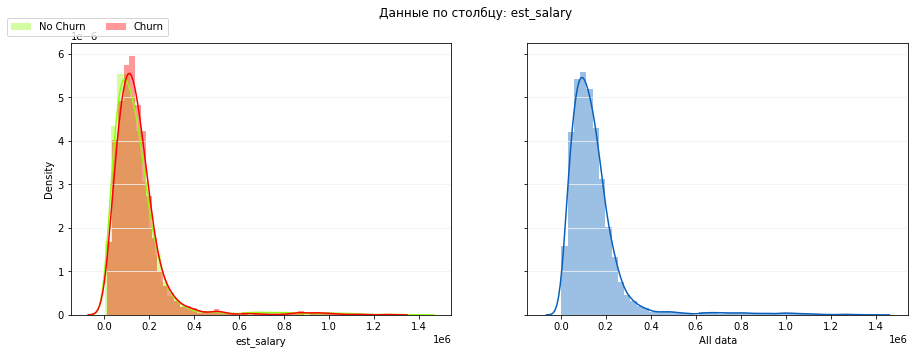

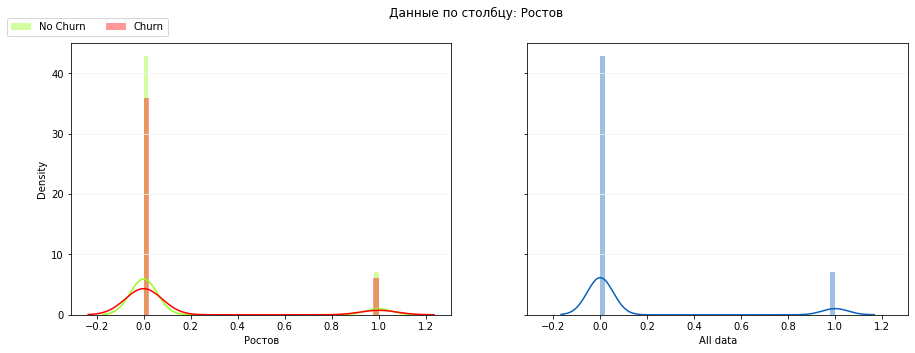

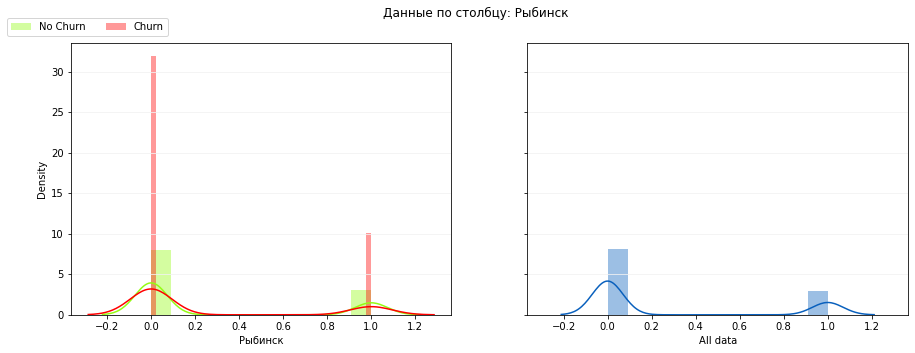

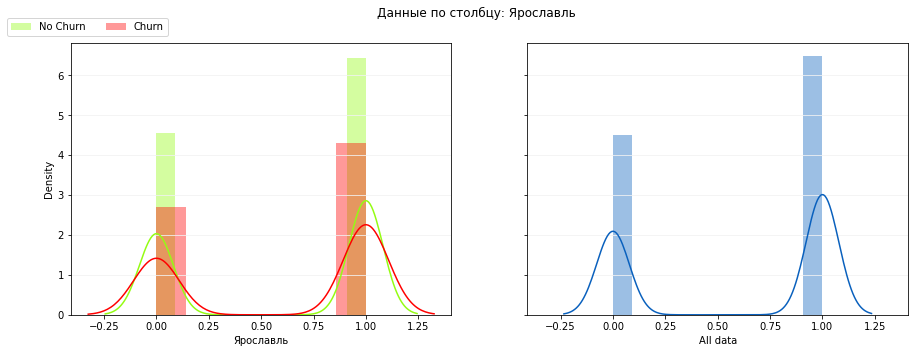

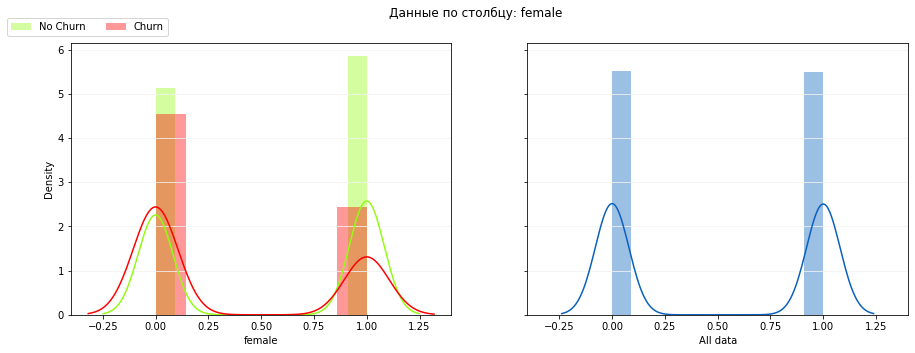

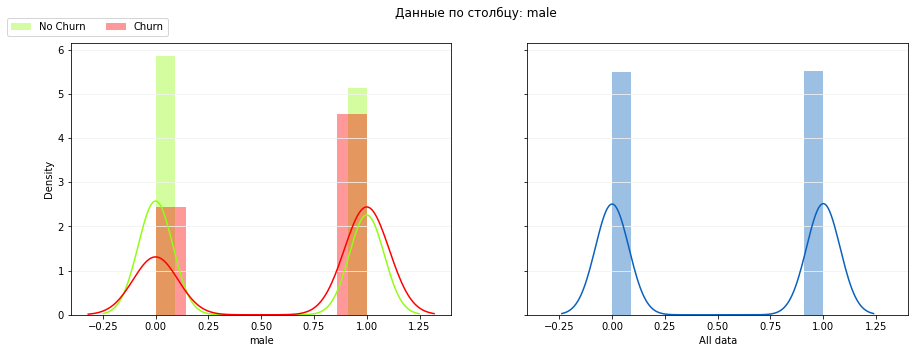

In [28]:
columns = data.drop(['churn', 'userid', 'city', 'gender'], axis=1).columns
for col in columns:
    x1 = data[data['churn']==0][col]
    x2 = data[data['churn']==1][col]
    x3 = data[col]
# plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
    fig.suptitle('Данные по столбцу: ' + col)
    sns.distplot(x1 , color="#94fc13", ax=axes[0], label='No Churn')
    sns.distplot(x2 , color="#ff0000", ax=axes[0], label = 'Churn')
    sns.distplot(x3 , color="#0960bd", ax=axes[1], axlabel='All data')
    fig.legend(bbox_to_anchor=(0.066, 0.9), loc='lower left', ncol=2, borderaxespad=0.)
    axes[0].set(ylabel='Density')
    axes[0].grid(axis='y', color='0.95')
    axes[1].grid(axis='y', color='0.95')
    plt.show()

Предварительные результаты:
- Проихсодит отток клиентов с более хорошим кредитным рейтингом;
- По большей мере отток происходит среди клиентов в возрате от 25 до 45 лет и от 50 до 62 лет;
- Также отток клиентов увеличивается вметсе с количеством баллов собственности, клиенты с 3 и более баллами даже чаще уходят, чем остаются;
- Клиенты со среднем балансом уходят реже, чем с большим, такие клиенты уходят чаще, чем остаются.
- Чаще всего уходят клиенты с двумя продуктами, но большая часть все же остается, но далее с количеством продуктов растет отток, а клиенты с 4 и более продуктами даже чаще уходят, чем остаются, стоит задуматься о качестве предлагаемых продуктов;
- Отток среди клиентов с кредитной картой немного больше, чем без кредитной карты, но клиенты с кредитной картой чаще остаются;
- В основном идет отток активных клиентов, неактивные клиенты уходят более чем в 2 раза реже;
- Отток сдвинут в сторону больших зарплат;
- Также чаще происходит отток мужчин.


### Проведем анализ поведения клиентов в разных городах

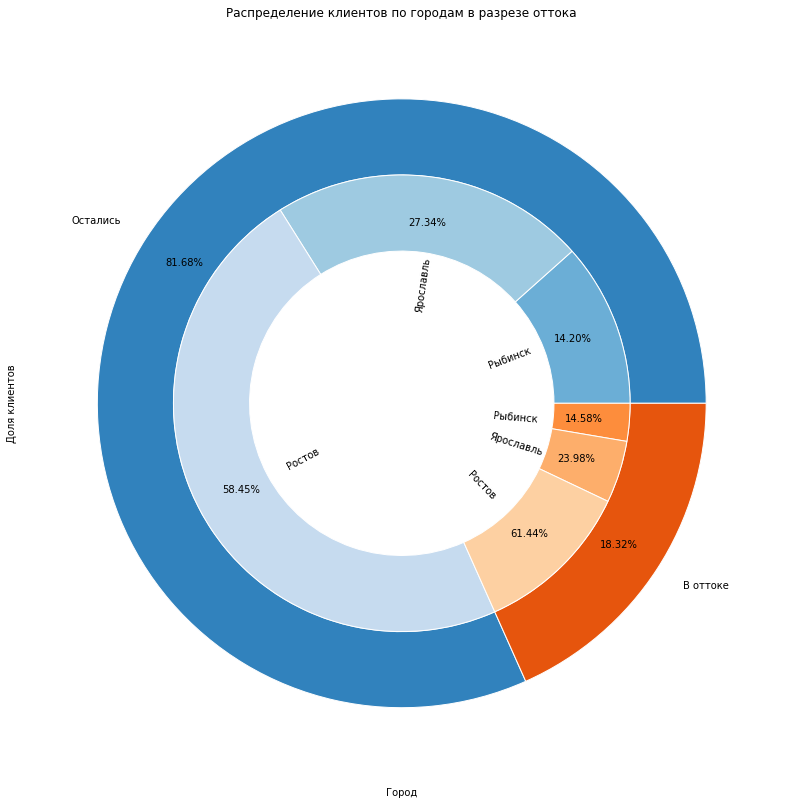

In [29]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(14)

size = 0.25
vals = np.array(
    [
        list(data.query('churn == 0').groupby('city').agg({'userid':'count'})['userid']),
        list(data.query('churn == 1').groupby('city').agg({'userid':'count'})['userid'])
    ]
)


def make_autopct(values, churn):
    def my_autopct(pct):
        total = sum(vals.flatten())
        val = pct * total / sum(vals[churn])
        return '{v:.2f}%'.format(v=val)
    return my_autopct

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = [
    cmap([1, 2, 3]),
    cmap([5, 6, 7])
]

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.2f%%', labels=['Остались', 'В оттоке'], pctdistance=0.85)

for i in [0, 1]:
    part_vals = vals[i] / sum(vals.flatten())
    ax.pie(
        part_vals,
        radius=1-size,
        colors=inner_colors[i],
        normalize=False,
        wedgeprops=dict(width=size, edgecolor='w'),
        autopct=make_autopct(part_vals, i),
        labels=data['city'].unique(),
        pctdistance=0.8,
        labeldistance=0.4,
        rotatelabels=True,
        counterclock=bool(not i)
    )

ax.set(aspect="equal", title='Распределение клиентов по городам в разрезе оттока', xlabel='Город', ylabel='Доля клиентов')

plt.show()

Как ни странно, но большинство клиентов уходит из Ростова, а не из Ярославля, где находится большая часть клиентов банка. Меньше всего клиентов уходит из Рыбинка, а общий процент оттока клиентов около 18%.

### Расчитаем матрицу корреляций и определим признаки, наиболее влияющие на отток

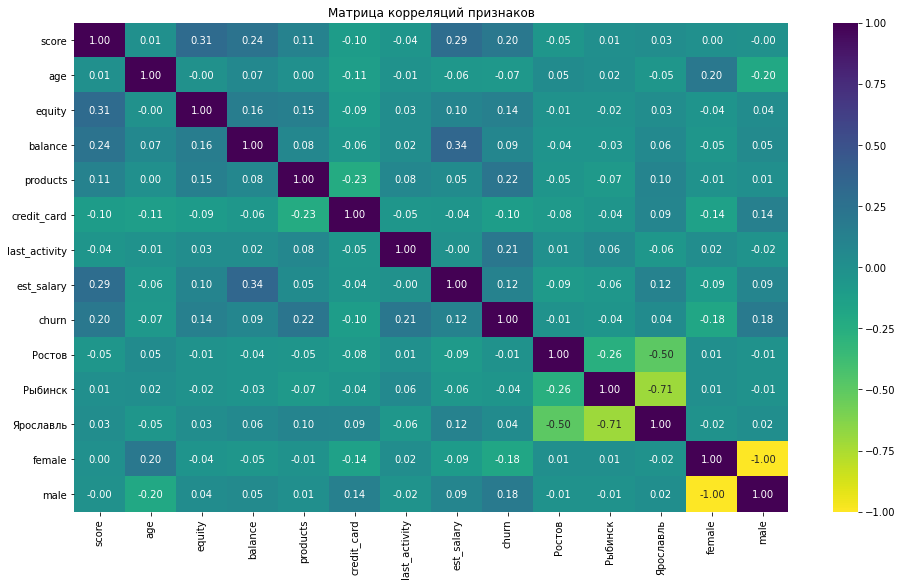

In [30]:
# рассчитываем матрицу
corr_matrix = data.query('balance > 0').drop('userid', axis=1).corr()

# строим тепловую карту
plt.figure(figsize=(16, 9))
plt.title('Матрица корреляций признаков')
ax=sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='viridis_r'
)
plt.show()

Как видно из матрицы, наибольшие коээфициенты корреляции с целевой переменной у следующих признаков:

- score - коэффициент 0,2;
- products - коэффициент 0,22;
- last_activity - коэффициент 0,21;
Также, имеется небольшая корреляция между признаками gender и equity.

### Распределение клиентов во количеству продуктов

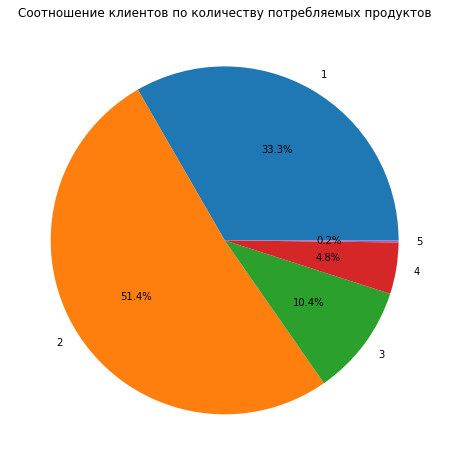

In [31]:
count_product = data.groupby('products')['products'].count()
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(count_product,labels=count_product.index, autopct='%1.1f%%')
ax1.set_title('Соотношение клиентов по количеству потребляемых продуктов');

У половины клиентов 2 продукта, если они продолжать приобретать еще продукты банка, то велика вероятность оттока таких клиентов.

## Проверка гипотез

Так как мы сравниваем две генеральные совокупности, которые не зависят друг от друга необходимо использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind (array1, array2, equal_var). Также берем стандартный критический уровень статистической значимости 0.05.

### Проверим гипотезу о влиянии дохода клиента

<br> Сформулируем нулевую и альтернативную гипотезы:

- H₀: средние доходы оставшихся и отточных клиентов равны
- H₁: средние доходы оставшихся и отточных клиентов не равны

<br> Для проверки гипотезы проведем t-test:

In [32]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8645271013531297
Не получилось отвергнуть нулевую гипотезу


Проведенный t-test показал, что нулевую гипотезу об отсутствии различий в доходах отточных и оставшихся клиентов мы не можем отвергнуть.

### Проверим гипотезу о влиянии наличия кредитных карт

<br> Сформулируем нулевую и альтернативную гипотезы:

- H₀: среднее количество кредитных карт у оставшихся и отточных клиентов равны
- H₁: среднее количество кредитных карт у оставшихся и отточных клиентов не равны

<br> Для проверки гипотезы проведем t-test:

In [33]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['credit_card'],
    data[data['churn']==1]['credit_card'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

3.714248387672835e-34
Отвергаем нулевую гипотезу


В данном случае t-test выявил наличие статистически значимой разницы между оставшимися и отточными пользователями. Ушедшие клиенты намного реже пользовались кредитными картами, чем оставшиеся клиенты.

## Определение потрета клиента, склонного к уходу

### Получим потрет среднего клиента банка и клиента в оттоке

In [34]:
print('\nОбщий портрет клиентов:')
display(data.groupby(['churn']).mean())


Общий портрет клиентов:


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль,female,male
churn,,,,,,,,,,,,,,
0,171900.13,845.44,43.02,2.38,733828.60,1.76,0.71,0.48,147795.99,0.14,0.27,0.58,0.53,0.47
1,170992.83,863.36,41.43,3.76,1134458.21,2.38,0.55,0.70,148357.48,0.15,0.24,0.61,0.35,0.65


<br> Собирая потрет клиента в оттоке воедино можно сказать, что:
- У данного клиента выше кредитный рейтинг, соответственно ему будет проще уйти к конкурентам;
- Средний возраст около 41 года
- больше баллов собственности - около 4;
- больше баланс на счете;
- пользовался двумя и более продуктами, стоит задуматься о качестве предоставляемых продуктов;
- проявлял активность в последнее время, возможно, неактивные клиенты меньше сталкиваются с "косяками" банка и соответственно не уходят в отток;
- больше зарплата;
- как правило, уходят чаще мужчины.
<br> Можно сделать вывод, что банк теряет активную платежспособную аудиторию и нужно срочно принимать меры.

### Сегментация клиентов и их приоритезация

<br> По итогам проведенного анализа данных выделим несколько высокоотточных сегментов клиентов банка.
<br> В качестве критериев для выделения выберем следующие параметры:
- пол;
- возраст;
- количество баллов собственности;
- количество используемых продуктов.

<br> Сегмент №1
<br> Пол: мужской
<br> Возраст: 50-62
<br> Количество баллов собственности: менее 5

In [35]:
# Рассчитаем общее число пользователей в  сегменте:
print ('Общее число пользователей в сегменте №1:', data.query (
    'male==1 and equity<5 and age>=50 \
    and age<=62')['userid'].count() )

# Рассчитаем число отточных пользователей в  сегменте:
print ('Число отточных пользователей в сегменте №1:', data.query (
    'male==1 and equity<5 and age>=50 \
    and age<=62 and  churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:',round(data.query (
    'male==1 and equity<5 and  age>=50 \
    and age<=62 and  churn==1')['userid'].count() / data.query (
    'male==1  and equity<5 and age>=50 \
    and age<=62 ')['userid'].count()*100,2))

Общее число пользователей в сегменте №1: 640
Число отточных пользователей в сегменте №1: 172
Доля отточных пользователей в сегменте №1: 26.88


<br> Сегмент №2
<br> Пол: женский
<br> Возраст: 50-62
<br> Количество баллов собственности: менее 5

In [36]:
# Рассчитаем общее число пользователей в сегменте:
print ('Общее число пользователей в сегменте №2:', data.query (
    'female==1 and equity<5 and  age>=50 \
    and age<=62')['userid'].count() )

# Рассчитаем число отточных пользователей в сегменте:
print ('Число отточных пользователей в сегменте №2:', data.query (
    'female==1 and equity<5 and age>=50 \
    and age<=62 and churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №2:',round(data.query (
    'female==1 and equity<5 and  age>=50 \
    and age<=62 and  churn==1')['userid'].count() / data.query (
    'female==1  and equity<5 and age>=50 \
    and age<=62  ')['userid'].count()*100,2))

Общее число пользователей в сегменте №2: 900
Число отточных пользователей в сегменте №2: 156
Доля отточных пользователей в сегменте №2: 17.33


<br> Сегмент №3
<br> Пол: мужской
<br> Возраст: от 50 до 62
<br> Количество используемых продуктов: менее 3

In [37]:
# Рассчитаем общее число пользователей в  сегменте:
print ('Общее число пользователей в сегменте №3:', data.query (
    'male==1 and  age>=50 \
    and age<=62 and products < 3')['userid'].count() )

# Рассчитаем число отточных пользователей в  сегменте:
print ('Число отточных пользователей в сегменте №3:', data.query (
    'male==1 and  age>=50 \
    and age<=62 and products < 3 and churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №3:',round(data.query (
    'male==1 and  age>=50 \
    and age<=62 and products < 3 and churn==1')['userid'].count() / data.query (
    'male==1 and  age>=50 \
    and age<=62 and products < 3')['userid'].count()*100,2))

Общее число пользователей в сегменте №3: 700
Число отточных пользователей в сегменте №3: 180
Доля отточных пользователей в сегменте №3: 25.71


<br> Сегмент №4
<br> Пол: мужской
<br> Возраст: от 25 до 45
<br> Количество баллов собственности: более 2

In [41]:
# Рассчитаем общее число пользователей в  сегменте:
print ('Общее число пользователей в сегменте №4:', data.query (
    'male==1 and equity>2 and  age>=25 \
    and age<=45')['userid'].count() )

# Рассчитаем число отточных пользователей в  сегменте:
print ('Число отточных пользователей в сегменте №4:', data.query (
    'male==1 and equity>2 and  age>=25 \
    and age<=45 and  churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №4:',round(data.query (
    'male==1 and equity>2 and  age>=25 \
    and age<=45 and  churn==1')['userid'].count() / data.query (
    'male==1 and equity>2 and age>=25 \
    and age<=45 ')['userid'].count()*100,2))

Общее число пользователей в сегменте №4: 1871
Число отточных пользователей в сегменте №4: 648
Доля отточных пользователей в сегменте №4: 34.63


<br> Сегмент №5
<br> Пол: мужской
<br> Возраст: от 25 до 45
<br> Количество используемых продуктов: 3 и более

In [39]:
# Рассчитаем общее число пользователей в сегменте:
print ('Общее число пользователей в сегменте №5:', data.query (
    'male==1  and age>=25 \
    and age<=45 and products >= 3')['userid'].count() )

# Рассчитаем число отточных пользователей в сегменте:
print ('Число отточных пользователей в сегменте №5:', data.query (
    'male==1 and  age>=25 \
    and age<=45 and products >= 3 and churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №5:',round(data.query (
    'male==1 and   age>=25 \
    and age<=45 and  products >= 3 and churn==1')['userid'].count() / data.query (
    'male==1 and   age>=25 \
    and age<=45 and products >= 3')['userid'].count()*100,2))

Общее число пользователей в сегменте №5: 502
Число отточных пользователей в сегменте №5: 242
Доля отточных пользователей в сегменте №5: 48.21


<br> Сегмент №6
<br> Пол: женский
<br> Возраст: от 25 до 45
<br> Количество используемых продуктов: 3 и более

In [40]:
# Рассчитаем общее число пользователей в сегменте:
print ('Общее число пользователей в сегменте №6:', data.query (
    'female==1  and age>=25 \
    and age<=45 and products >= 3')['userid'].count() )

# Рассчитаем число отточных пользователей в сегменте:
print ('Число отточных пользователей в сегменте №6:', data.query (
    'female==1 and  age>=25 \
    and age<=45 and products >= 3 and churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №6:',round(data.query (
    'female==1 and   age>=25 \
    and age<=45 and  products >= 3 and churn==1')['userid'].count() / data.query (
    'female==1 and   age>=25 \
    and age<=45 and products >= 3')['userid'].count()*100,2))

Общее число пользователей в сегменте №6: 418
Число отточных пользователей в сегменте №6: 135
Доля отточных пользователей в сегменте №6: 32.3


<br> В итоге:
- Доля отточных пользователей в сегменте №1: 26.88%
- Доля отточных пользователей в сегменте №2: 17.33%
- Доля отточных пользователей в сегменте №3: 25.71%
- Доля отточных пользователей в сегменте №4: 34.63%
- Доля отточных пользователей в сегменте №5: 48.21%
- Доля отточных пользователей в сегменте №6: 32.3%

### Приоритизация сегментов

<br> Самым высокооточным сегментом окзалася Сегмент №5, также подтвердился тот факт, что отток среди мужчин выше:
- Пол: мужской
- Возраст: от 25 до 45
- Количество используемых продуктов: 3 и более.
<br> Выведем на экран сегменты в порядке их доли оттока.

In [44]:
segment_5 = data.query (
    'male==1  and age>=25 \
    and age<=45 and products >= 3') 
segment_5

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
15,120260,731,Рыбинск,М,42,3,1480548.47,3,1,0,160974.43,0,0,1,0,0,1
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1,0,0,1,0,1
81,223978,850,Рыбинск,М,34,5,351583.16,4,0,1,115354.97,1,0,1,0,0,1
95,172823,855,Ярославль,М,41,1,312743.28,3,0,0,268100.87,0,0,0,1,0,1
103,128618,841,Ростов,М,29,1,175505.11,4,1,1,48188.69,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9820,133758,919,Ярославль,М,42,5,2183175.39,4,1,1,206343.23,1,0,0,1,0,1
9835,163071,961,Ярославль,М,38,5,2298650.66,4,1,0,247334.13,0,0,0,1,0,1
9862,154435,861,Рыбинск,М,43,4,448896.95,3,0,0,169994.66,0,0,1,0,0,1
9887,187204,957,Ярославль,М,35,4,3431029.03,4,1,0,354987.43,1,0,0,1,0,1


In [45]:
segment_4 = data.query (
    'male==1 and equity>2 and  age>=25 \
    and age<=45') 
segment_4

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
14,172138,815,Ярославль,М,35,5,547499.87,2,1,1,105883.26,0,0,0,1,0,1
15,120260,731,Рыбинск,М,42,3,1480548.47,3,1,0,160974.43,0,0,1,0,0,1
16,123335,829,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0,0,0,1,0,1
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900,158143,807,Ростов,М,43,4,1124809.48,1,1,1,185230.60,1,1,0,0,0,1
9904,154871,892,Рыбинск,М,39,5,636287.72,2,0,1,227288.27,1,0,1,0,0,1
9911,158678,889,Ярославль,М,35,4,880534.89,4,1,1,126564.61,0,0,0,1,0,1
9913,162357,822,Ярославль,М,31,3,646575.17,1,1,1,88297.63,0,0,0,1,0,1


In [46]:
segment_6 = data.query (
    'female==1  and age>=25 \
    and age<=45 and products >= 3') 
segment_6

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,0,0,1,1,0
33,125478,786,Ростов,Ж,27,3,448062.52,3,1,1,37607.67,0,1,0,0,1,0
76,213688,922,Ярославль,Ж,37,5,1214707.38,4,0,1,85121.07,0,0,0,1,1,0
90,156141,788,Ярославль,Ж,40,3,313725.58,3,0,1,73128.09,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,178980,780,Ярославль,Ж,37,0,234063.47,3,0,0,97867.41,0,0,0,1,1,0
9818,157510,775,Ростов,Ж,34,5,1483350.04,3,1,1,94062.42,0,1,0,0,1,0
9845,185901,895,Ярославль,Ж,41,2,190250.81,3,0,0,105340.99,0,0,0,1,1,0
9846,136184,860,Ярославль,Ж,41,4,1317459.84,3,0,0,117341.52,0,0,0,1,1,0


In [50]:
segment_1 = data.query (
    'male==1 and equity<5 and age>=50 \
    and age<=62') 
segment_1

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,0,1,0,0,1
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0,1,0,0,0,1
17,214277,793,Ярославль,М,53,3,627034.50,2,1,0,183430.19,0,0,0,1,0,1
22,161656,871,Ярославль,М,51,4,708866.92,1,1,0,106407.26,0,0,0,1,0,1
41,206939,814,Рыбинск,М,56,2,1067536.40,2,1,0,95563.19,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,167524,856,Ярославль,М,50,3,265390.36,2,1,1,154039.56,1,0,0,1,0,1
9830,169251,911,Ярославль,М,55,3,415077.50,1,1,0,157976.16,0,0,0,1,0,1
9854,179096,782,Ярославль,М,55,1,218820.71,3,0,0,62248.20,0,0,0,1,0,1
9866,199340,890,Ярославль,М,61,4,1041694.29,2,1,1,132913.41,0,0,0,1,0,1


In [49]:
segment_3 = data.query (
    'male==1 and  age>=50 \
    and age<=62 and products < 3') 
segment_3

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0,1,0,0,0,1
17,214277,793,Ярославль,М,53,3,627034.50,2,1,0,183430.19,0,0,0,1,0,1
22,161656,871,Ярославль,М,51,4,708866.92,1,1,0,106407.26,0,0,0,1,0,1
36,199614,822,Ярославль,М,60,5,1472483.77,1,1,1,89132.67,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,167524,856,Ярославль,М,50,3,265390.36,2,1,1,154039.56,1,0,0,1,0,1
9830,169251,911,Ярославль,М,55,3,415077.50,1,1,0,157976.16,0,0,0,1,0,1
9866,199340,890,Ярославль,М,61,4,1041694.29,2,1,1,132913.41,0,0,0,1,0,1
9870,195177,914,Ярославль,М,53,0,NaN,1,0,0,131314.32,0,0,0,1,0,1


In [48]:
segment_2 = data.query (
    'female==1 and equity<5 and  age>=50 \
    and age<=62') 
segment_2

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
19,127034,922,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0,0,1,0,1,0
25,189712,806,Ярославль,Ж,61,2,288289.94,2,1,1,55366.82,0,0,0,1,1,0
26,174396,898,Ярославль,Ж,62,3,364049.27,3,0,1,50661.84,0,0,0,1,1,0
39,173175,924,Рыбинск,Ж,51,0,NaN,1,1,1,248844.47,0,0,1,0,1,0
57,167752,914,Ростов,Ж,58,0,NaN,2,1,0,116651.71,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,190839,925,Рыбинск,Ж,57,0,NaN,1,0,1,146407.76,0,0,1,0,1,0
9840,135787,767,Ярославль,Ж,52,0,NaN,1,1,0,315243.30,0,0,0,1,1,0
9868,205255,769,Ярославль,Ж,60,4,1409579.65,2,1,1,66316.67,0,0,0,1,1,0
9910,151279,783,Рыбинск,Ж,61,3,387916.16,2,1,0,63160.96,1,0,1,0,1,0


## Общие рекомендации

1. Известно, что большинство клиентов уходит из Ростова, но в Ярославле клиенты уходят чаще, чем остаются, хотя там находится большая часть клиентов банка, соответственно в первую очередь нужно проверить качество оказываемых услуг в данных городах.
2. Банк теряет активную платежспособную аудиторию, отток растет с количеством приобретаемых продуктов, стоит задуматься о качестве предлагаемых продуктов
3. Так как в основной массе банк покидают мужчины возможно провести целевую рекламу продуктов именно для них.
4. Активных и неактивных клиентов почти пополам, это не очень хороший показатель для банка, стоит его взять на контроль

## Общий вывод

<br> В данной работе была проведена предобработка данных о клиентах банка, всего около 10 000 строк.
<br> Получена общая информация о данных:
- Срдений возраст пользователей банка - 43 года. Минимальный - 18 лет, а самый старший - 86. Средний возраст клиентов в городах тоже практически одинаковый.
- Средний баланс карты - 828 248р, достаточно неплохо, но также имеются клиенты с нулевым балансом.
- В половины у клиентов банка имеется 2 продукта.
- Средняя зарплата клиентов банка равна 147 886 рублей. Минимальная - 2546 рубля, скорее всего это какая-то выплата или пособие, которая пришла на карту клиенту.
- Мы видим, что в большинстве столбцов данные распределены нормально, стандартное отклоенине небольшое, также по полу клиенты распределены практически пополам.
- Также большая часть клиентов пользуется кредитной картой.

<br> По результатам исследовательского анализа данных можно составить потрет клиента, склонного к оттоку:
- по большей мере отток происходит среди клиентов в возрате от 25 до 45 лет и от 50 до 62 лет;
- отток клиентов увеличивается вметсе с количеством баллов собственности, клиенты с 3 и более баллами даже чаще уходят, чем остаются;
- у такого клиента выше кредитный рейтинг, соответственно ему будет проще уйти к конкуренту;
- уходят клиенты с большей зарплатой и балансом на счете;
- клиент пользовался двумя и более продуктами, стоит задуматься о качестве предоставляемых продуктов;
- идет отток активных клиентов, неактивные клиенты уходят более чем в 2 раза реже. Возможно, неактивные клиенты меньше сталкиваются с "косяками" банка и соответственно не уходят в отток;
- мужчины уходят чаще.

<br> Общий процент оттока клиентов составляет около 18%.

<br> Была проведена сегментация клиентов для выявления группы с наибольшим процентом оттока, в итоге мы получили следующие значения:
- Доля отточных пользователей в сегменте №5: **48.21%**
Пол: мужской
Возраст: от 25 до 45
Количество используемых продуктов: 3 и более
- Доля отточных пользователей в сегменте №4: **34.63%**
Пол: мужской
Возраст: от 25 до 45
Количество баллов собственности: более 2
- Доля отточных пользователей в сегменте №6: **32.3%**
Пол: женский
Возраст: от 25 до 45
Количество используемых продуктов: 3 и более
- Доля отточных пользователей в сегменте №1: **26.88%**
Пол: мужской
Возраст: от 50 до 62
Количество баллов собственности: менее 5
- Доля отточных пользователей в сегменте №3: **25.71%**
Пол: мужской
Возраст: от 50 до 62
Количество используемых продуктов: менее 3
- Доля отточных пользователей в сегменте №2: **17.33%**
Пол: женский
Возраст: от 50 до 62
Количество баллов собственности: менее 5


|          | Сегмент № 1 | Сегмент № 2 | Сегмент № 3 | Сегмент № 4 | Сегмент № 5 | Сегмент № 6 |
|----------|----------|----------|----------|----------|----------|----------|
| Доля отточных пользователей, % | 26.88   | 17.33   | 25.71   | 34.63   | 48.21   | 32.3   |
| Пол | мужской   | женский   | мужской   | мужской   | мужской   | женский   |
| Возраст | 50-62   | 50-62   | 50-62   | 25-45   | 25-45   | 25-45   |
| Количество баллов собственности | менее 5   | менее 5   | ---   | более 2   | ---   | ---   |
|Количество используемых продуктов | ---   | ---   | менее 3 | ---  | 3 и более   | 3 и более   |

<br> Наблюдается небольшая корреляции с оттоком у следующих признаков:
- score - коэффициент 0,2;
- products - коэффициент 0,22;
- last_activity - коэффициент 0,21; 
<br> Также, имеется небольшая корреляция между признаками gender и equity.

<br> Проверка гипотез:
- Проведенный t-test показал, что нулевую гипотезу об отсутствии различий в доходах отточных и оставшихся клиентов мы не можем отвергнуть.
- В данном случае t-test выявил наличие статистически значимой разницы между оставшимися и отточными пользователями. Ушедшие клиенты намного реже пользовались кредитными картами, чем оставшиеся клиенты.